In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

import warnings
warnings.filterwarnings('ignore')

In [3]:
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

# EXPLORATORY DATA ANALYSIS

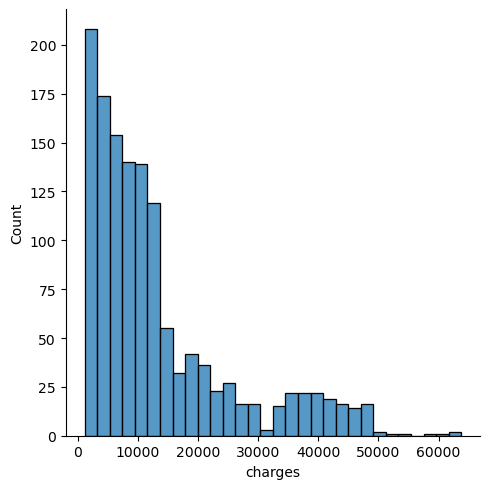

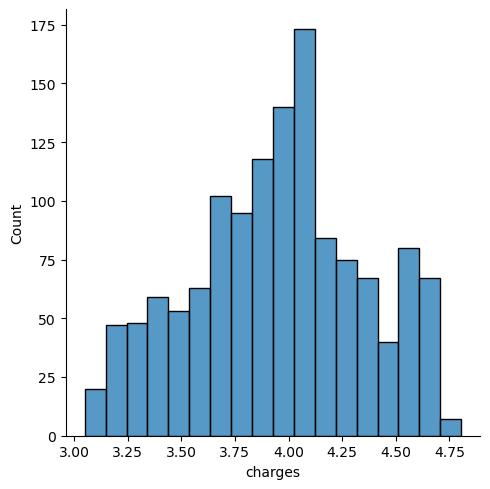

In [8]:
#WE CAN APPLY LOG TRANSFORM TO CORREST SKEWNESS
skewed = sns.displot(insurance['charges']) #Charges is right-skewed
skewed

log_trans = sns.displot(np.log10(insurance['charges'])) #skewness is corrected using log transform
log_trans

In [9]:
#CHARGES BY REGION
charges = insurance['charges'].groupby(insurance['region']).sum().sort_values(ascending=True)
charges

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64

In [10]:
fig = px.bar(charges, title='Charges by Region', color=charges, color_continuous_scale=px.colors.sequential.RdBu)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=0, plot_bgcolor='white', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>Charges: %{y}')
fig.show()

<AxesSubplot:xlabel='region', ylabel='charges'>

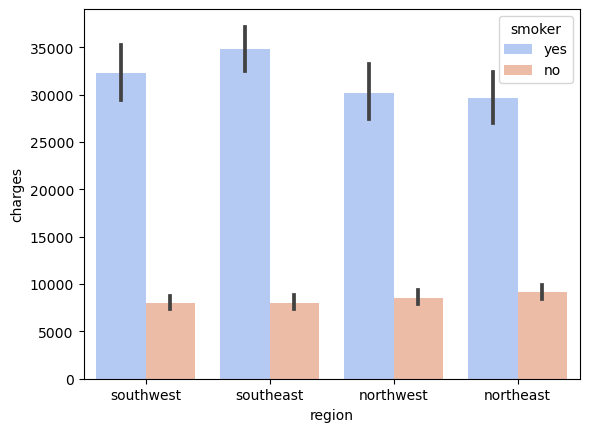

In [11]:
#WE CHECK THE CHAGES BY REGION WHO ARE SMOKERS
sns.barplot(x='region', y='charges', data=insurance, hue='smoker', palette='coolwarm')

<AxesSubplot:xlabel='region', ylabel='charges'>

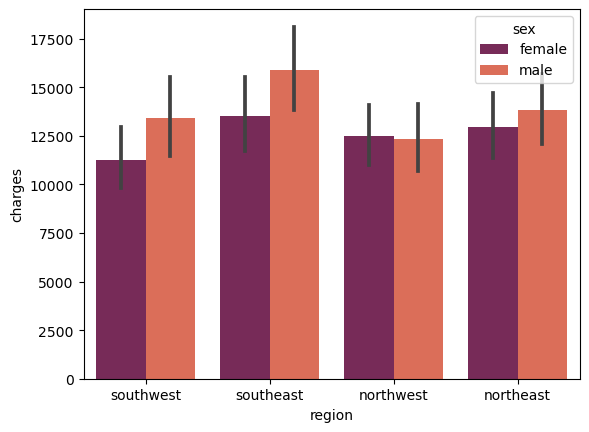

In [12]:
#WE CHECK THE CHARGES BY REGION BY THIER SEX
sns.barplot(x='region', y='charges', data=insurance, hue='sex', palette='rocket')

<AxesSubplot:xlabel='region', ylabel='charges'>

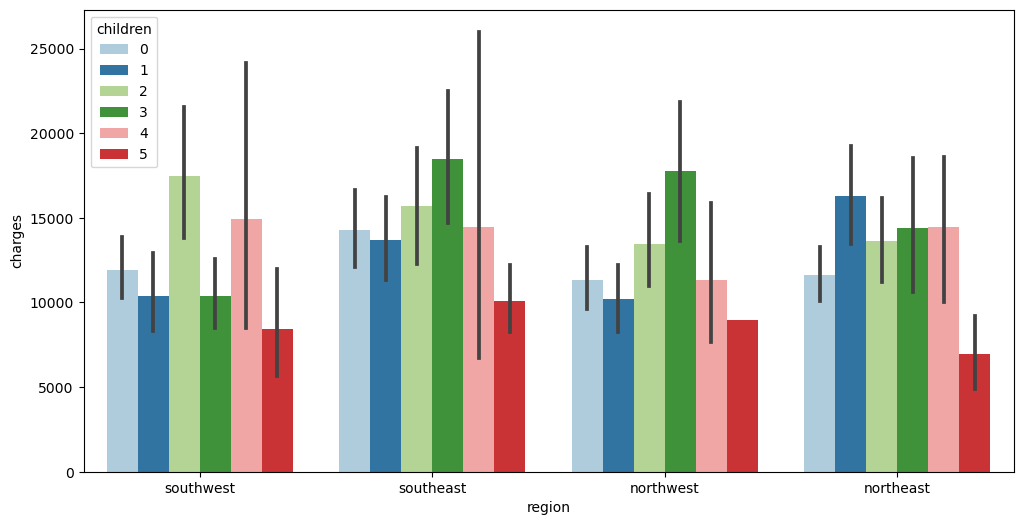

In [13]:
#WE CHECK THE CHARGES BY REGION BY THE CHILDREN AVAILABLE
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', data=insurance, hue='children', palette='Paired')

<AxesSubplot:xlabel='children', ylabel='charges'>

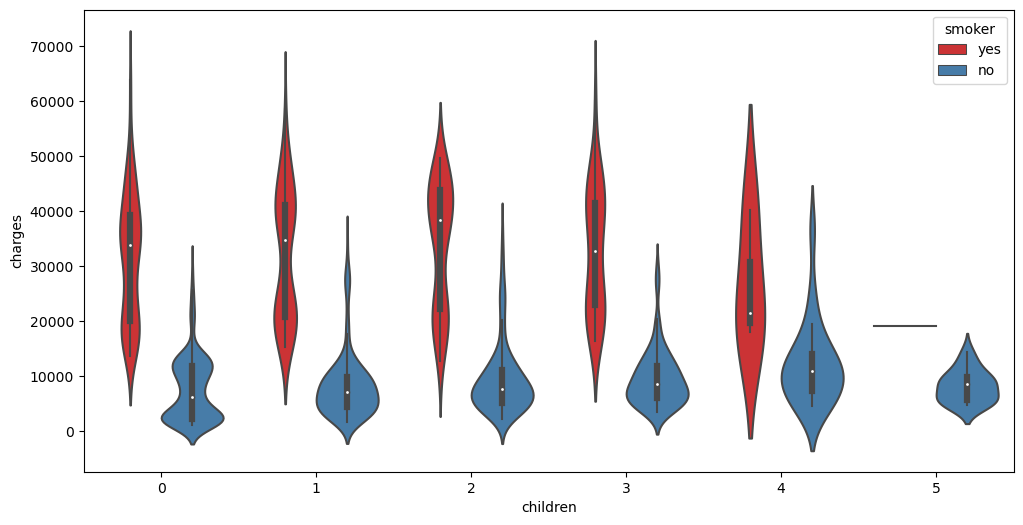

In [14]:
plt.figure(figsize=(12,6))
sns.violinplot(x='children', y='charges', data=insurance, hue='smoker',split=False, palette='Set1')

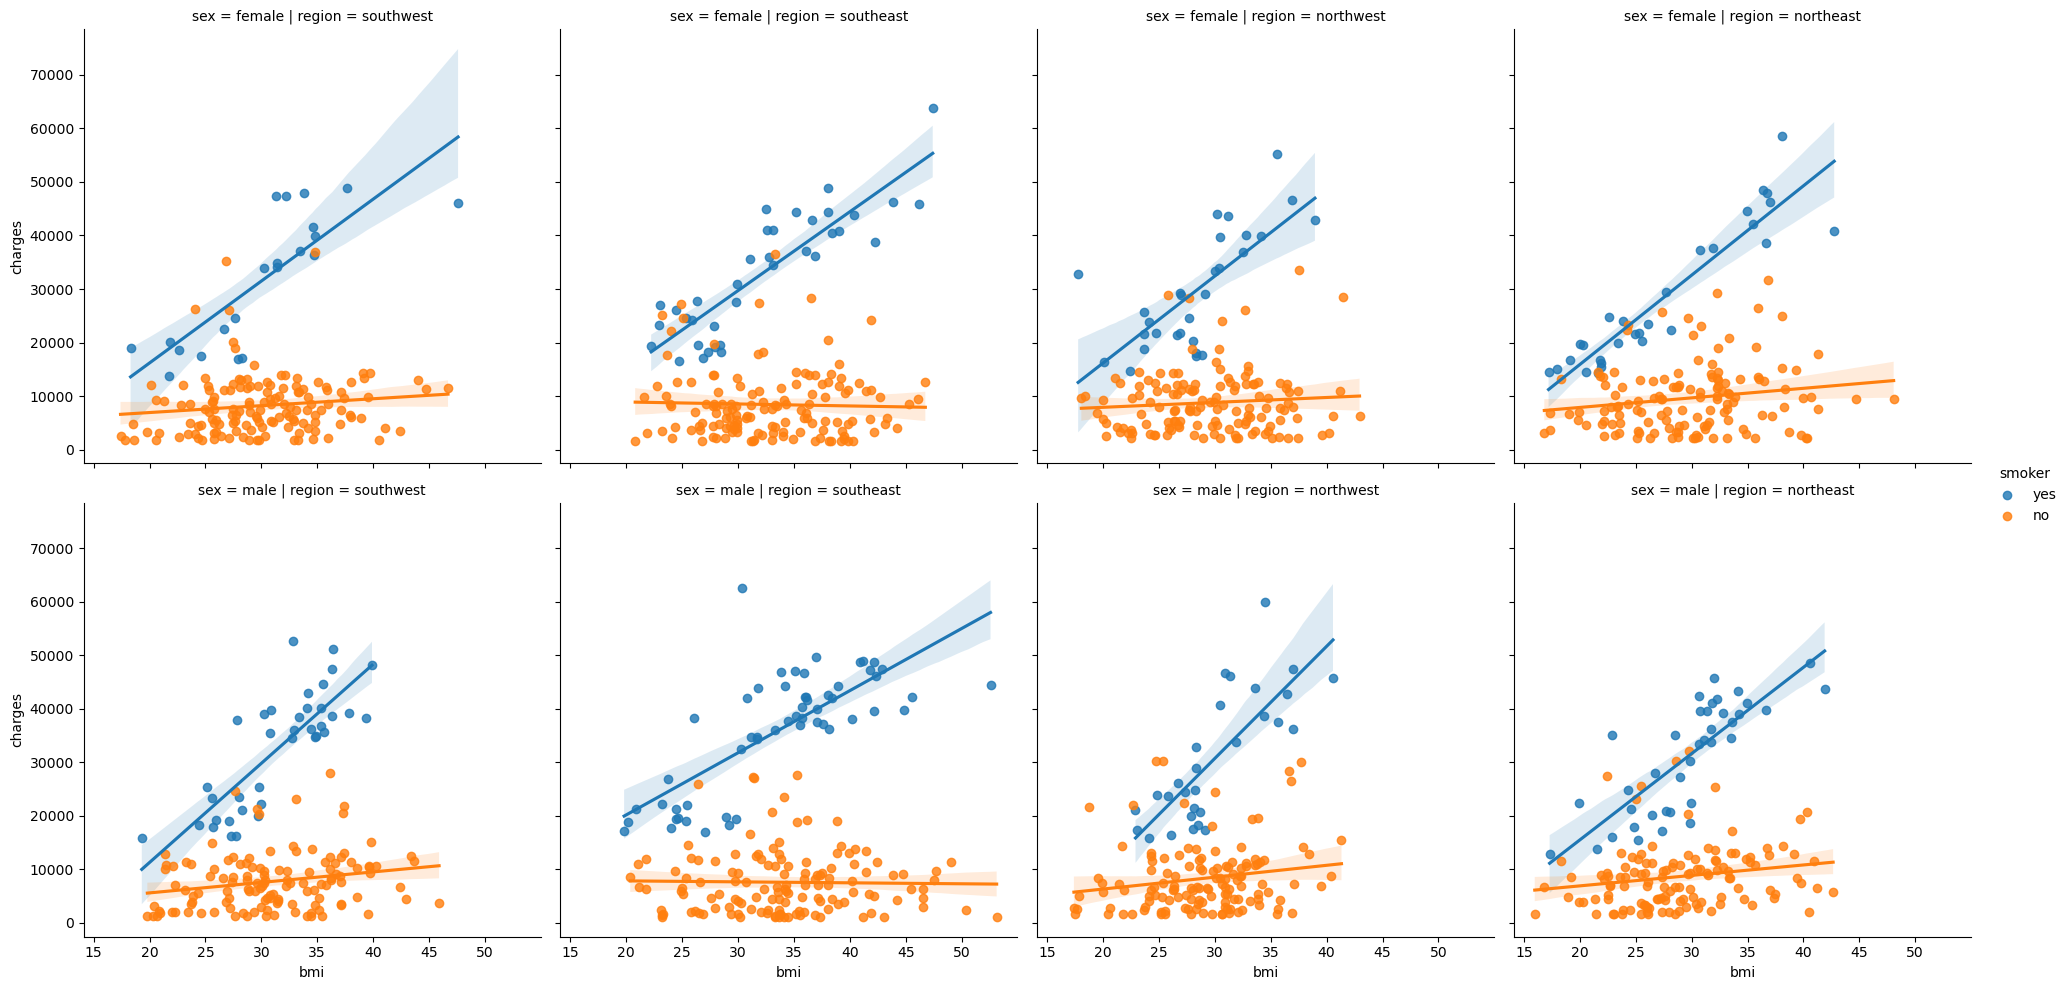

In [15]:
#regression plot to understand the relationship between the bmi and charges considering other features
sns.lmplot(x="bmi", y="charges", row="sex", col="region", hue='smoker', data=insurance)

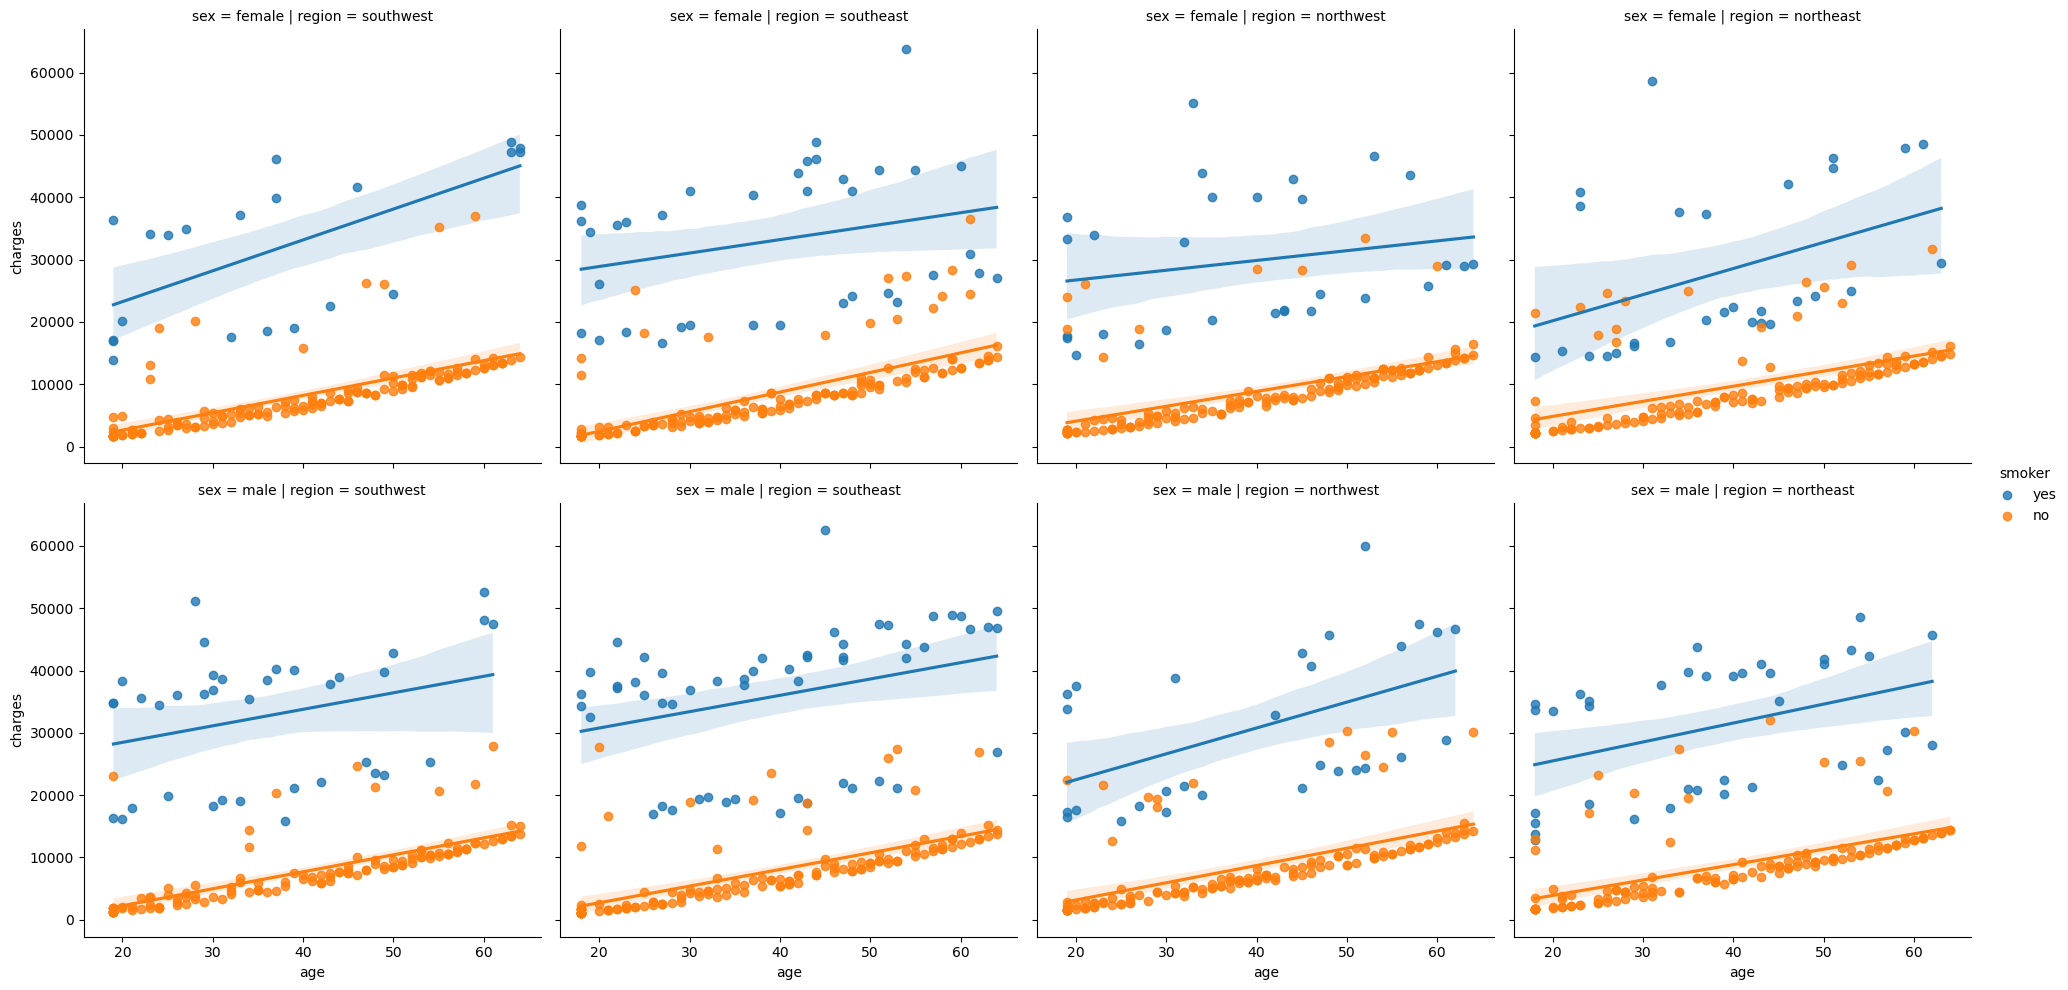

In [16]:
#regression plot to understand the relationship between the age and charges considering other features
sns.lmplot(x="age", y="charges", row="sex", col="region", hue='smoker', data=insurance)

From the chart above we can see that those who are smokers get a higher medical insurance charges than those that are none smoker

In [17]:
#WE CONVERT OBJECT LABELS INTO CATEGORICAL DATA TYPE
insurance[['sex','region','smoker']] = insurance[['sex','region','smoker']].astype('category')
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [18]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(insurance.sex.drop_duplicates())
insurance.sex = label.transform(insurance.sex)
label.fit(insurance.smoker.drop_duplicates())
insurance.smoker = label.transform(insurance.smoker)
label.fit(insurance.region.drop_duplicates())
insurance.region = label.transform(insurance.region)

In [19]:
insurance.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

<AxesSubplot:>

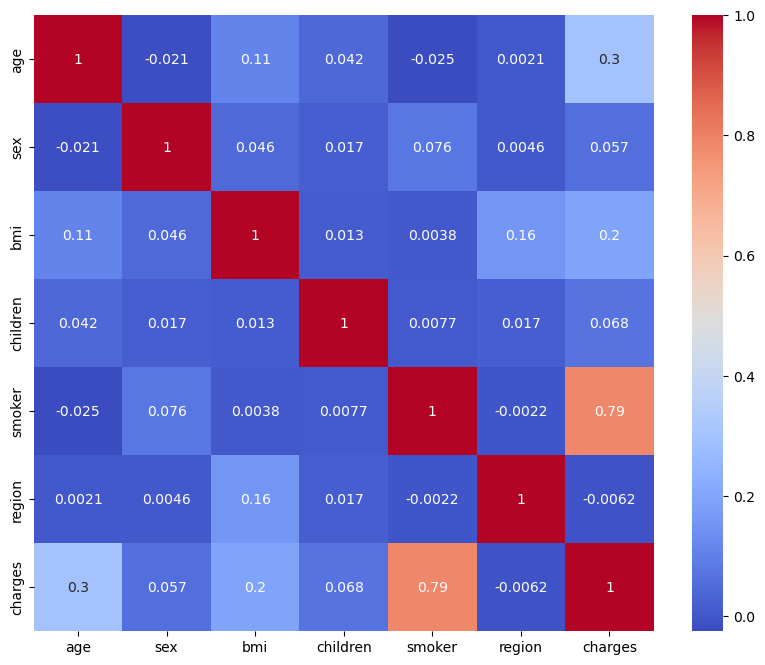

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(insurance.corr(),cmap='coolwarm',annot=True)

# WE SPLIT THE DATA INTO PREDICTOR AND RESPONSE VARIABLE 

In [21]:
#we split our model
X = insurance.drop(['charges'], axis = 1)
y = insurance['charges']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# MODEL BUILDING

In [23]:
import statsmodels.api as sm #WE GET THE STATISTICAL MODEL

#add constant to predictor variables
X2 = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     496.0
Date:                Tue, 24 Jan 2023   Prob (F-statistic):          5.53e-304
Time:                        14:05:18   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.166e+04   1079.677    -10.801      0.000   -1.38e+04   -9543.444
age          253.9919     13.517     18.791      0.000     227.469     280.514
sex          -24.3246    377.828     -0.064      0.949    -765.697     717.048
bmi          328.4026     31.035     10.582      0.000     267.506     389.299
children     443.7293    156.293      2.839      0.005     137.051     750.408
smoker      2.357e+04    468.557     50.301      0.000    2.26e+04    2.45e+04
region      -288.5086    172.599     -1.672      0.095    -627.181      50.164
==============================================================================
Omnibus:                      255.422   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              614.129
Skew:                           1.273   Prob(JB):                    4.40e-134
Kurtosis:                       5.700   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared: 0.747. This is known as the coefficient of determination. It is the proportion of the variance in the response variable that can be explained by the predictor variables. In this example, 74.7% of the variation in the exam scores can be explained by the number of hours studied and the number of prep exams taken.

F-statistic: 523.6. This is the overall F-statistic for the regression model.

Prob (F-statistic): 3.16e-313. This is the p-value associated with the overall F-statistic. It tells us whether or not the regression model as a whole is statistically significant. In other words, it tells us if the predictor variables combined have a statistically significant association with the response variable. In this case the p-value is less than 0.05, which indicates that the predictor variables combined have a statistically significant association with the response variable.

coef: The coefficients for each predictor variable tell us the average expected change in the response variable, assuming the other predictor variable remains constant.

P>|t|. The individual p-values tell us whether or not each predictor variable is statistically significant. it statistically significant at α < 0.05 and not statistically significant at α => 0.05. Since “sex” is not statistically significant, we may end up deciding to remove it from the model.

# MULTIPLE LINEAR REGRESSION MODEL

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print('Score', lm.score(X_test, y_test))

Intercept -11661.983908824424
Coefficient [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
Score 0.7998747145449959


In [28]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
age         253.991852
sex         -24.324551
bmi         328.402617
children    443.729295
smoker    23568.879484
region     -288.508573

In [29]:
#WE PREDICT OUR MODEL
y_pred1 = lm.predict(X_test)

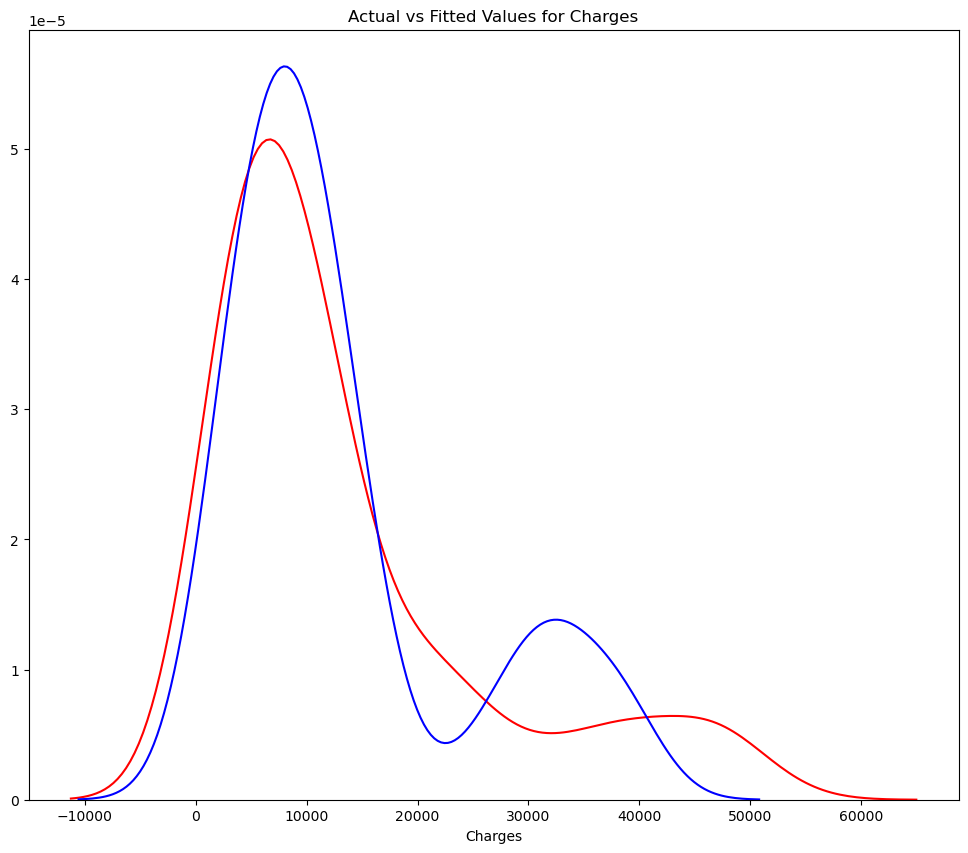

In [30]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')

plt.show()
plt.close()

ANOTHER PLOTTING TECHNIQUE

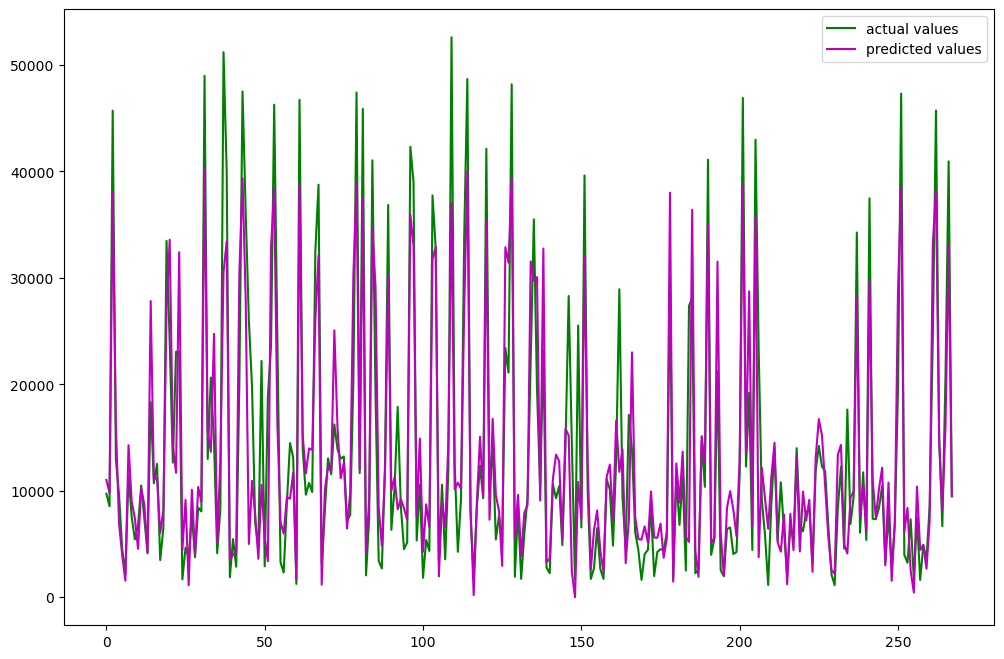

In [31]:
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],y_pred1, c='m',label="predicted values")
plt.legend()
plt.show()

In [32]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predicted1.head()

Actual     Predicted
578    9724.53000  11017.230479
610    8547.69130   9787.530168
569   45702.02235  37994.782118
1034  12950.07120  16122.778407
198    9644.25250   6930.759230

# LASSO REGRESSION MODEL

In [33]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [34]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=101) #we’ll use the RepeatedKFold() function to perform k-fold cross-validation to find the optimal alpha value to use for the penalty term

#define model
lasso_model = LassoCV(alphas=(0.1, 1.0, 10.0), cv=cv, n_jobs=-1) 

#fit model
lasso_model.fit(X_train, y_train)

LassoCV(alphas=(0.1, 1.0, 10.0),
        cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=101),
        n_jobs=-1)

In [35]:
print(lasso_model.intercept_)
print(lasso_model.coef_)
print(lasso_model.score(X_test, y_test))

-11646.886838222317
[  253.94827311    -0.           327.80766491   436.86422237
 23506.7529265   -280.11227545]
0.7996147889122028


In [36]:
#WE PREDICT OUR LASSOCV REGRESSION MODEL
y_pred2 = lasso_model.predict(X_test)

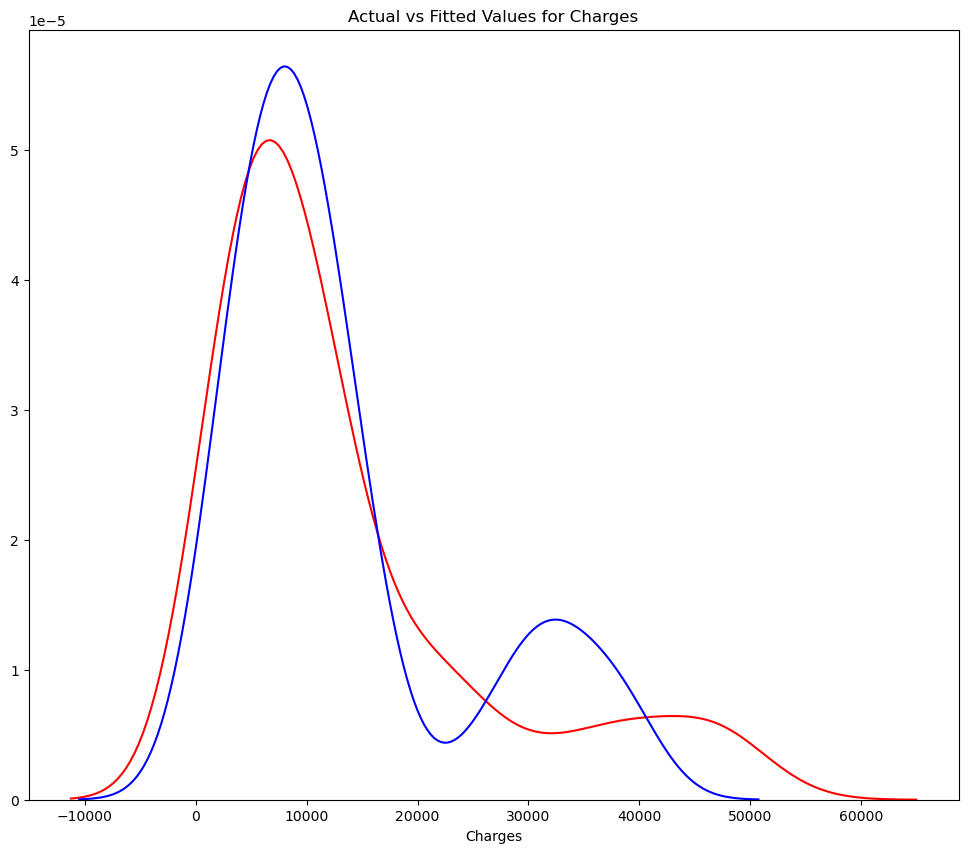

In [37]:
# Visualising the Lasso Regression results
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')

plt.show()
plt.close()

In [38]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predicted2.head()

Actual     Predicted
578    9724.53000  11054.742240
610    8547.69130   9793.032788
569   45702.02235  37940.517294
1034  12950.07120  16145.103726
198    9644.25250   6941.291167

# RIDGE REGRESSION MODEL

In [39]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [40]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101)

#define model
rid_model = RidgeCV(alphas=(0.1, 1.0, 10.0), cv=cv, scoring='neg_mean_absolute_error', gcv_mode='eigen')

#fit model
rid_model.fit(X_train, y_train)

RidgeCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=101),
        gcv_mode='eigen', scoring='neg_mean_absolute_error')

In [41]:
print(rid_model.intercept_)
print(rid_model.coef_)
print(rid_model.score(X_test, y_test))

-11658.267128761492
[  253.97218695   -23.75976696   328.389979     443.83145352
 23555.2656266   -288.61276294]
0.7998402449403278


In [42]:
#WE PREDICT OUR RIDGECV REGRESSION MODEL
y_pred3 = rid_model.predict(X_test)

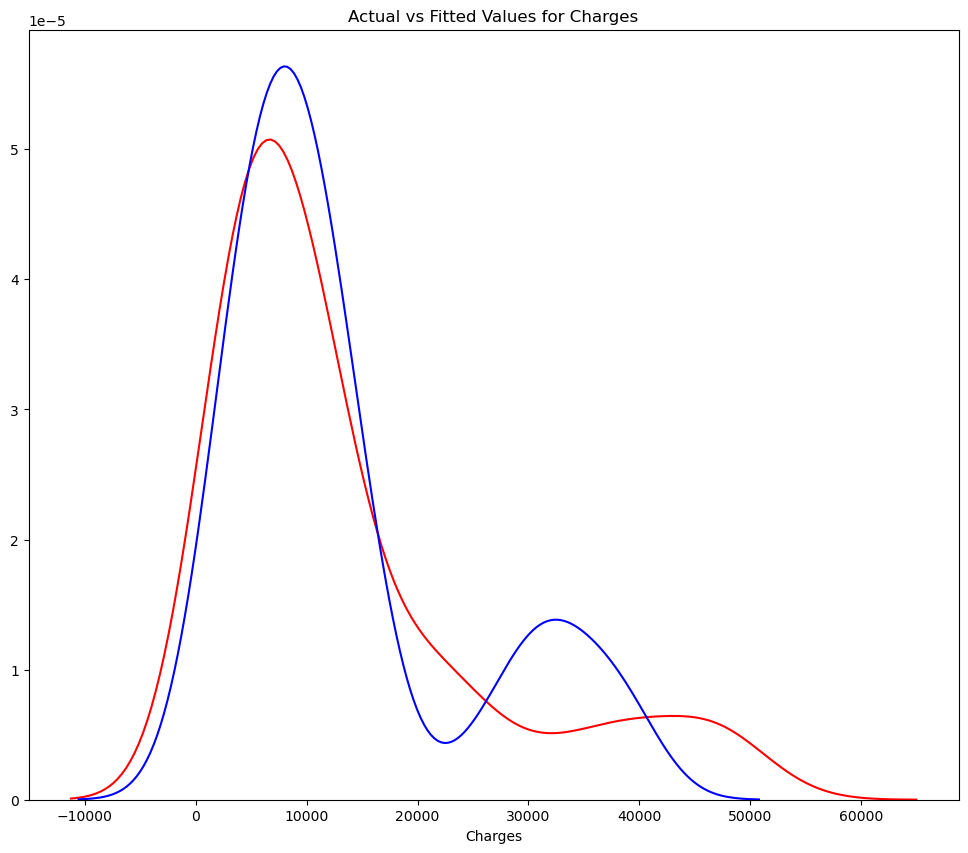

In [43]:
# Visualising the Ridge Regression results
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')

plt.show()
plt.close()

In [44]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
predicted3.head()

Actual     Predicted
578    9724.53000  11019.897356
610    8547.69130   9789.845269
569   45702.02235  37984.093347
1034  12950.07120  16125.271139
198    9644.25250   6933.140764

# ELASTICNET REGRESSOR

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

In [46]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
net_model = ElasticNet(alpha=0.1, l1_ratio=0.9, fit_intercept=True, max_iter=1000, random_state=101, selection = 'random')

# evaluate model
scores = cross_val_score(net_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

net_model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=101, selection='random')

In [47]:
print(net_model.intercept_)
print(net_model.coef_)
print(net_model.score(X_test, y_test))

-11285.889403902422
[  252.00804753    30.18980721   327.1212075    453.74379195
 22195.90360538  -298.69829707]
0.7944736484078737


In [48]:
y_pred4 = net_model.predict(X_test)

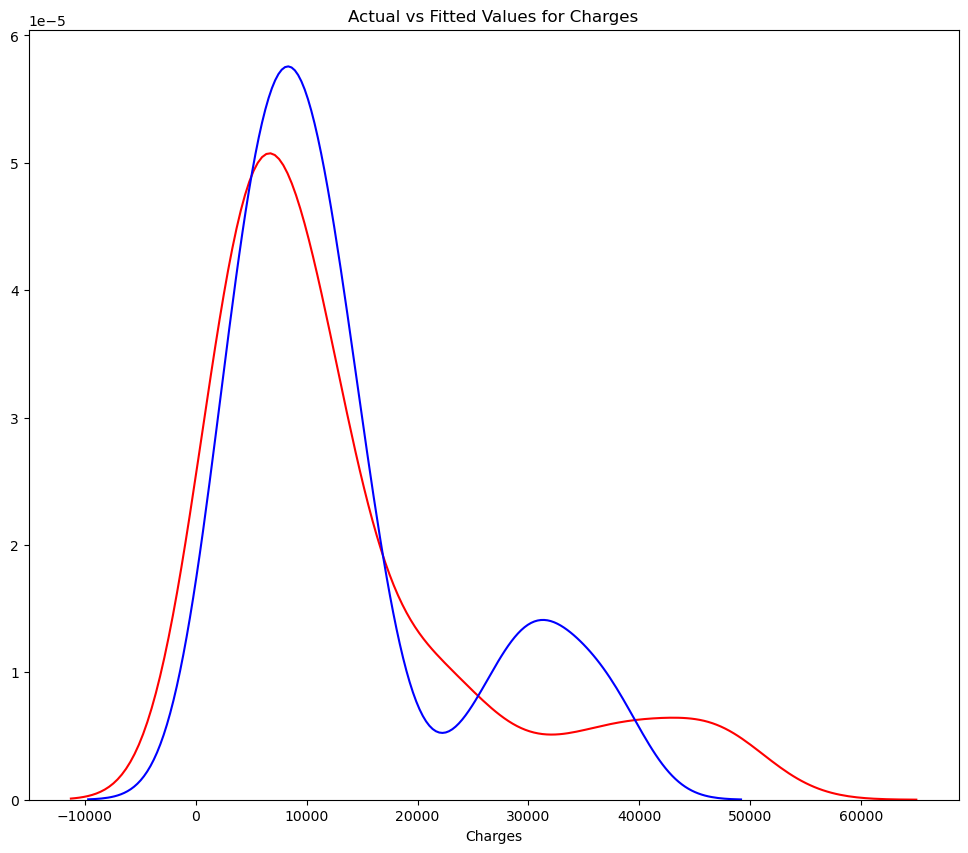

In [49]:
# Visualising the ElasticNet Regressor results
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred4, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')

plt.show()
plt.close()

In [50]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
predicted4.head()

Actual     Predicted
578    9724.53000  11285.428242
610    8547.69130  10022.385892
569   45702.02235  36915.051359
1034  12950.07120  16373.004949
198    9644.25250   7172.360518

# RANDOM FOREST REGRESSOR

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
Ram_reg = RandomForestRegressor(n_estimators = 100, criterion='mse', min_samples_split=2, random_state = 123, n_jobs=-1)

# fit the regressor model
Ram_reg.fit(X_train, y_train) 

RandomForestRegressor(criterion='mse', n_jobs=-1, random_state=123)

In [53]:
print(Ram_reg.score(X_test, y_test))

0.872456159076052


In [54]:
y_pred5 = Ram_reg.predict(X_test)

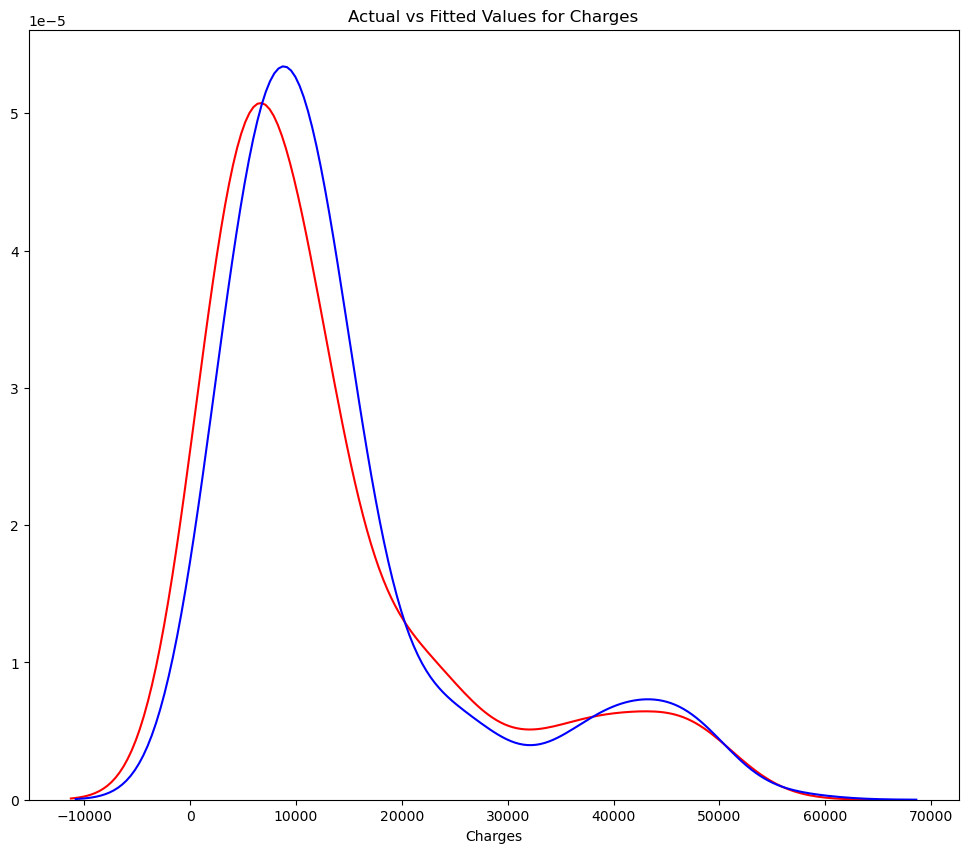

In [55]:
# Visualising the Random Forest Regressor results
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred5, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')

plt.show()
plt.close()

In [56]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5})
predicted5.head()

Actual     Predicted
578    9724.53000  11256.412451
610    8547.69130   8851.396563
569   45702.02235  44555.272739
1034  12950.07120  13216.121727
198    9644.25250  10217.641145

# WE TRY SELECT THE BEST FEATURES USING FEATURE IMPORTANCE FROM RANDOM FOREST REGRESSOR

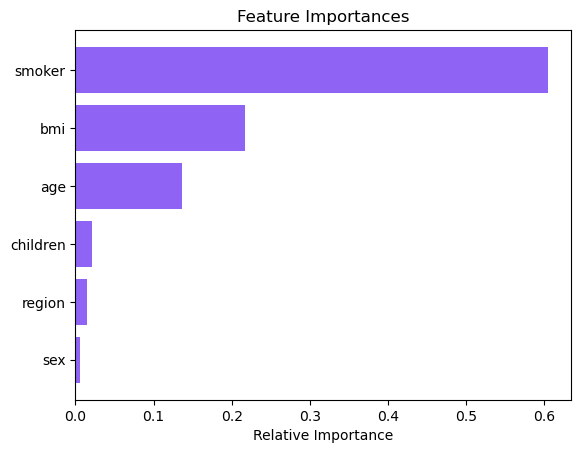

In [57]:
features = X.columns
importances = Ram_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that the smoker, bmi and age are more important features compared to the other features.

In [58]:
#We select the import features

X = insurance.drop(['charges', 'region', 'sex'], axis = 1)
y = insurance['charges']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
X.shape

(1338, 4)

# WE BUILD A MODEL USING THE POLYNOMIAL REGRESSION AFTER FEATURE IMPORTANCE

# POLYNOMIAL REGRESSION MODEL

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)

In [61]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [62]:
print(pol_reg.intercept_)
print(pol_reg.coef_)
print(pol_reg.score(X_test, y_test))

-5325.881705252405
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345228


In [63]:
#WE PREDICT OUR POLYNOMIAL REGRESSION MODEL
y_pred6 = pol_reg.predict(X_test)

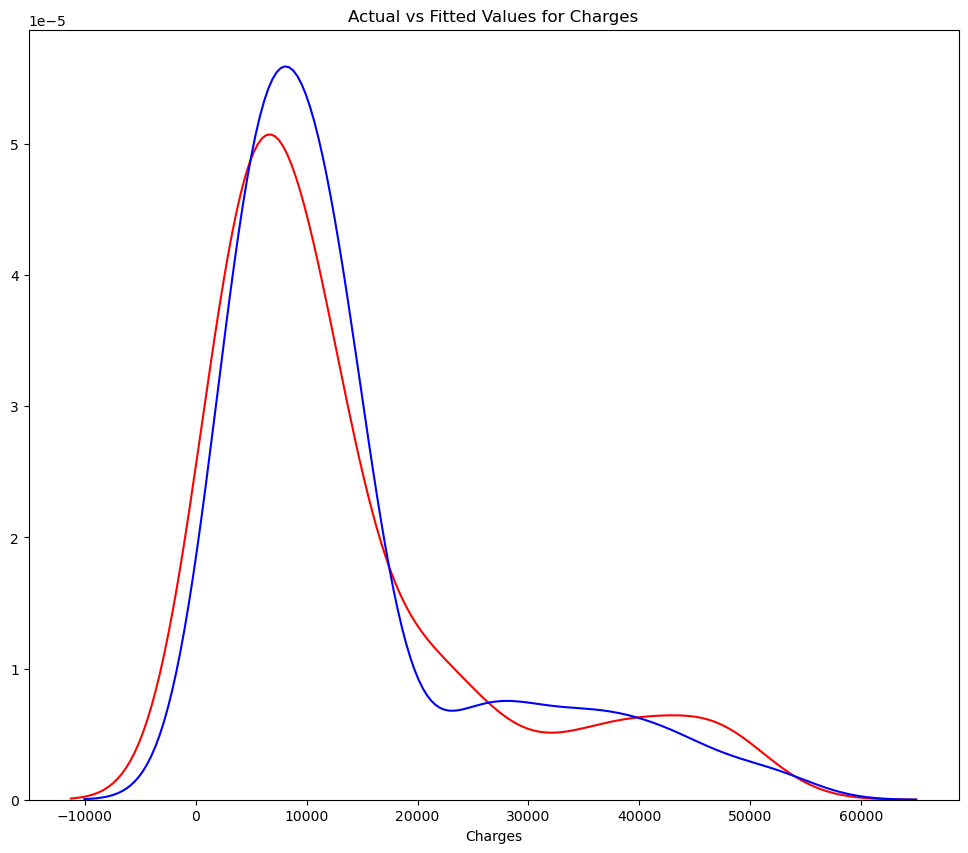

In [64]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred6, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')

plt.show()
plt.close()

In [65]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted6 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred6})
predicted6.head()

Actual     Predicted
578    9724.53000  12101.156323
610    8547.69130  10440.782266
569   45702.02235  48541.022951
1034  12950.07120  14140.067522
198    9644.25250   8636.235727

# MODEL EVALUATION

In [74]:
from sklearn import metrics
from sklearn.metrics import r2_score

# MULTIPLE LINEAR REGRESSION

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 3930.333273901141
Mean Square Error: 31845929.13415943
Root Mean Square Error: 5643.219748880902


# LASSOCV REGRESSION

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 3936.5755972022525
Mean Square Error: 31887291.090312354
Root Mean Square Error: 5646.883307658513


# RIDGECV REGRESSION

In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 3931.5986037010252
Mean Square Error: 31851414.281051528
Root Mean Square Error: 5643.705722400091


# ELASTICNET REGRESSION

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

Mean Absolute Error: 4071.1360944537428
Mean Square Error: 32705400.585058995
Root Mean Square Error: 5718.863574615065


# RANDOM FOREST REGRESSOR

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred5))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 2687.240165902549
Mean Square Error: 20296046.600647017
Root Mean Square Error: 4505.113383772601


# POLYNOMIAL REGRESSION

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred6))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

Mean Absolute Error: 2824.4950454776426
Mean Square Error: 18895160.09878039
Root Mean Square Error: 4346.856346692445


From the model evaluation score, we can see that polynomial regression and the Random Forest Regressor are performing well than
the other models.

We can conclude that smoking have an high impact on the cost of medical insurance follwed by bmi and age. Sex is not really
a determining factor